In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math

In [3]:
x=pd.read_csv("Annual_Stock_Price_Fundamentals.csv", index_col=0)
y=pd.read_csv("Annual_Stock_Price_Performance.csv", index_col=0)

In [4]:
x

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period_x,Report Date,Publish Date,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
0,A,45846,USD,2008,FY,2008-10-31,2008-12-19,2010-12-20,363000000.0,371000000.0,...,756000000,-140000000.0,150000000.0,-1.720000e+08,-3.850000e+08,NaN,1.600000e+07,-790000000.0,-7.880000e+08,-421000000
1,A,45846,USD,2009,FY,2009-10-31,2009-12-21,2011-12-16,346000000.0,346000000.0,...,408000000,-127000000.0,94000000.0,4.300000e+07,-4.000000e+06,NaN,7.480000e+08,-86000000.0,6.470000e+08,1074000000
2,A,45846,USD,2010,FY,2010-10-31,2010-12-20,2012-12-20,347000000.0,353000000.0,...,718000000,-114000000.0,38000000.0,-1.108000e+09,-1.174000e+09,0.0,7.180000e+08,-112000000.0,6.010000e+08,170000000
3,A,45846,USD,2011,FY,2011-10-31,2011-12-16,2013-12-19,347000000.0,355000000.0,...,1260000000,-170000000.0,16000000.0,-9.700000e+07,1.294000e+09,0.0,-1.500000e+09,-193000000.0,-1.693000e+09,878000000
4,A,45846,USD,2012,FY,2012-10-31,2012-12-20,2014-12-22,348000000.0,353000000.0,...,1228000000,-194000000.0,5000000.0,-2.257000e+09,-2.366000e+09,-104000000.0,1.500000e+08,-72000000.0,-3.500000e+07,-1174000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,ZYXI,171401,USD,2016,FY,2016-12-31,2017-04-18,2018-02-28,34398357.0,34398357.0,...,1769000,NaN,NaN,NaN,-2.260000e+05,NaN,-1.304000e+06,0.0,-1.304000e+06,239000
23405,ZYXI,171401,USD,2017,FY,2017-12-31,2018-02-28,2019-02-26,35371600.0,36515600.0,...,8260000,NaN,NaN,NaN,-8.700000e+04,0.0,-2.517000e+06,-183000.0,-2.855000e+06,5318000
23406,ZYXI,171401,USD,2018,FY,2018-12-31,2019-02-26,2019-02-26,35753300.0,37447300.0,...,9408000,NaN,NaN,NaN,-1.082000e+06,NaN,-5.070000e+05,-3256000.0,-3.763000e+06,4563000
23407,ZYXI,171401,USD,2019,FY,2019-12-31,2020-02-27,2021-02-25,35682900.0,37359300.0,...,6303000,-160000.0,NaN,NaN,-1.600000e+05,-2262000.0,-1.900000e+04,50000.0,-2.231000e+06,3912000


In [5]:
y

,Ticker,Open Price,Date,Volume,Ticker2,Open Price2,Date2,Volume2
0,A,16.78,2008-12-19,2.483239e+08,A,29.60,2009-12-21,9.319856e+07
1,A,29.60,2009-12-21,9.319856e+07,A,40.65,2010-12-21,1.469619e+08
2,A,40.10,2010-12-20,1.613504e+08,A,33.99,2011-12-20,1.247977e+08
3,A,33.73,2011-12-16,1.053320e+08,A,39.98,2012-12-17,1.381149e+08
4,A,40.58,2012-12-20,1.545570e+08,A,57.47,2013-12-20,1.697664e+08
...,...,...,...,...,...,...,...,...
23404,ZYXI,0.31,2017-04-18,3.528730e+03,ZYXI,3.15,2018-04-18,1.889842e+05
23405,ZYXI,4.55,2018-02-28,5.852392e+05,ZYXI,4.51,2019-02-28,2.961627e+05
23406,ZYXI,5.09,2019-02-26,2.683601e+05,ZYXI,11.90,2020-02-26,3.442361e+06
23407,ZYXI,11.25,2020-02-27,4.283404e+06,ZYXI,14.55,2021-02-26,3.741924e+07


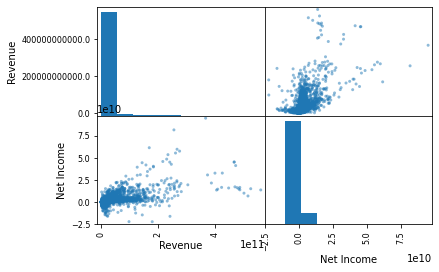

In [6]:
from pandas.plotting import scatter_matrix
attributes=["Revenue","Net Income"]
scatter_matrix(x[attributes]);

In [7]:
# Find out things about Y data
print("Y Shape:", y.shape)
print("X Shape:", x.shape)

Y Shape: (23409, 8)
X Shape: (23409, 74)


In [8]:
# Issue where no share price
bool_list = ~y["Open Price"].isnull()
y=y[bool_list]
x=x[bool_list]

# Issues where no listed number of shares
bool_list = ~x["Shares (Diluted)_x"].isnull()
y=y[bool_list]
x=x[bool_list]

# Issue where there is low/no volume
bool_list =   ~((y['Volume']<1e4) | (y['Volume2']<1e4))
y=y[bool_list]
x=x[bool_list]

# Issue where dates missing (Removes latest data too, which we can't use)
bool_list = ~y["Date2"].isnull()
y=y[bool_list]
x=x[bool_list]
               
y=y.reset_index(drop=True)
x=x.reset_index(drop=True)

In [9]:
y

,Ticker,Open Price,Date,Volume,Ticker2,Open Price2,Date2,Volume2
0,A,16.78,2008-12-19,2.483239e+08,A,29.60,2009-12-21,9.319856e+07
1,A,29.60,2009-12-21,9.319856e+07,A,40.65,2010-12-21,1.469619e+08
2,A,40.10,2010-12-20,1.613504e+08,A,33.99,2011-12-20,1.247977e+08
3,A,33.73,2011-12-16,1.053320e+08,A,39.98,2012-12-17,1.381149e+08
4,A,40.58,2012-12-20,1.545570e+08,A,57.47,2013-12-20,1.697664e+08
...,...,...,...,...,...,...,...,...
18515,ZYNE,4.80,2019-03-11,2.979552e+06,ZYNE,3.61,2020-03-10,2.898415e+06
18516,ZYNE,3.61,2020-03-10,2.898415e+06,ZYNE,4.58,2021-03-10,7.940090e+06
18517,ZYXI,4.55,2018-02-28,5.852392e+05,ZYXI,4.51,2019-02-28,2.961627e+05
18518,ZYXI,5.09,2019-02-26,2.683601e+05,ZYXI,11.90,2020-02-26,3.442361e+06


In [10]:
x["Market Cap"] = y["Open Price"]*x["Shares (Diluted)_x"]

In [11]:
x

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period_x,Report Date,Publish Date,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,Market Cap
0,A,45846,USD,2008,FY,2008-10-31,2008-12-19,2010-12-20,363000000.0,371000000.0,...,-140000000.0,150000000.0,-1.720000e+08,-3.850000e+08,NaN,1.600000e+07,-790000000.0,-7.880000e+08,-421000000,6.225380e+09
1,A,45846,USD,2009,FY,2009-10-31,2009-12-21,2011-12-16,346000000.0,346000000.0,...,-127000000.0,94000000.0,4.300000e+07,-4.000000e+06,NaN,7.480000e+08,-86000000.0,6.470000e+08,1074000000,1.024160e+10
2,A,45846,USD,2010,FY,2010-10-31,2010-12-20,2012-12-20,347000000.0,353000000.0,...,-114000000.0,38000000.0,-1.108000e+09,-1.174000e+09,0.0,7.180000e+08,-112000000.0,6.010000e+08,170000000,1.415530e+10
3,A,45846,USD,2011,FY,2011-10-31,2011-12-16,2013-12-19,347000000.0,355000000.0,...,-170000000.0,16000000.0,-9.700000e+07,1.294000e+09,0.0,-1.500000e+09,-193000000.0,-1.693000e+09,878000000,1.197415e+10
4,A,45846,USD,2012,FY,2012-10-31,2012-12-20,2014-12-22,348000000.0,353000000.0,...,-194000000.0,5000000.0,-2.257000e+09,-2.366000e+09,-104000000.0,1.500000e+08,-72000000.0,-3.500000e+07,-1174000000,1.432474e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,ZYNE,901704,USD,2018,FY,2018-12-31,2019-03-11,2021-03-10,15308886.0,15308886.0,...,-286658.0,NaN,NaN,-2.866580e+05,NaN,NaN,32500000.0,2.993750e+07,-2746504,7.348265e+07
18516,ZYNE,901704,USD,2019,FY,2019-12-31,2020-03-10,2021-03-10,22000203.0,22000203.0,...,-129390.0,NaN,NaN,-1.293900e+05,NaN,NaN,47096732.0,4.524684e+07,10299469,7.942073e+07
18517,ZYXI,171401,USD,2017,FY,2017-12-31,2018-02-28,2019-02-26,35371600.0,36515600.0,...,NaN,NaN,NaN,-8.700000e+04,0.0,-2.517000e+06,-183000.0,-2.855000e+06,5318000,1.661460e+08
18518,ZYXI,171401,USD,2018,FY,2018-12-31,2019-02-26,2019-02-26,35753300.0,37447300.0,...,NaN,NaN,NaN,-1.082000e+06,NaN,-5.070000e+05,-3256000.0,-3.763000e+06,4563000,1.906068e+08


In [13]:
x.shape

(18520, 75)

In [14]:
y.shape

(18520, 8)

In [15]:
x.to_csv("Annual_Stock_Price_Fundamentals_Filtered.csv")
y.to_csv("Annual_Stock_Price_Performance_Filtered.csv")